In [2]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col = 'student number')

In [4]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                        name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [5]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product_deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product_deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [8]:
np.var(en_scores, ddof = 0), np.var(ma_scores, ddof = 0)

(86.000, 68.440)

In [9]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [10]:
np.cov(en_scores, ma_scores, ddof = 0)[0, 1] /\
(np.std(en_scores) * np.std(ma_scores))

0.819

In [11]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [12]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

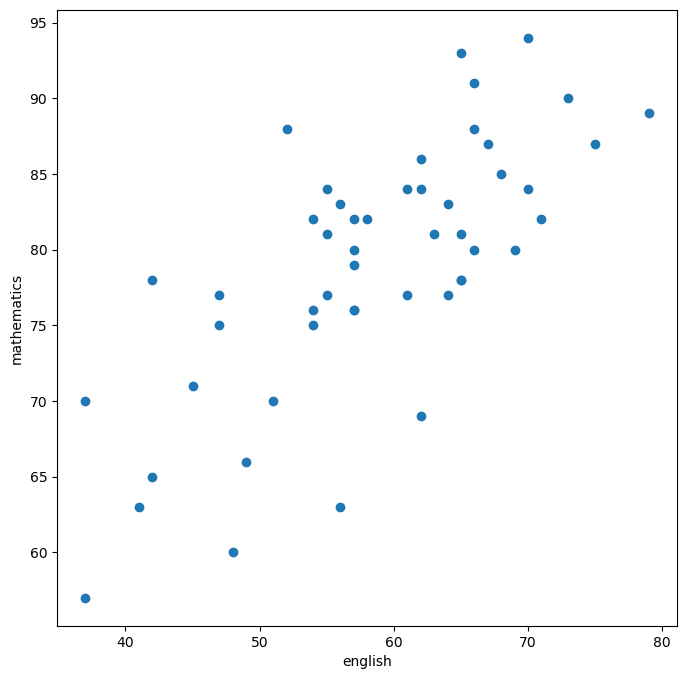

In [14]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

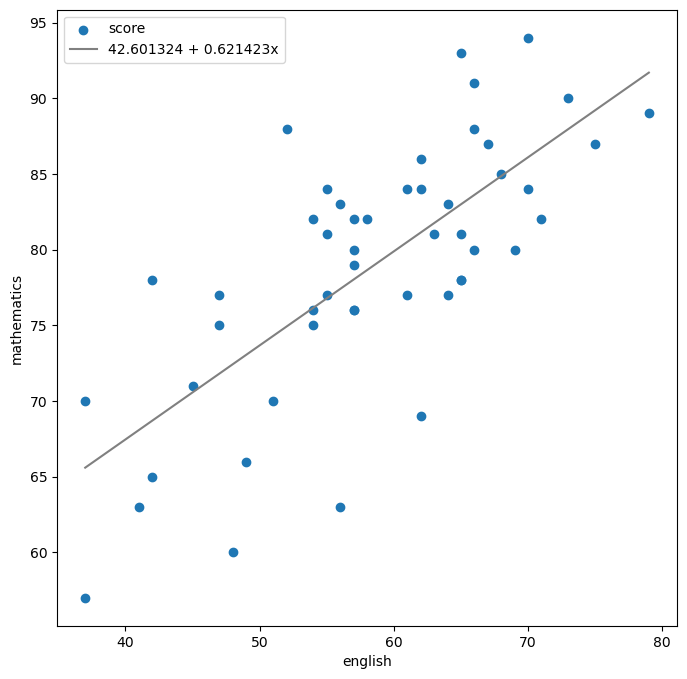

In [19]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:2f} + {poly_fit[0]:2f}x')

ax.legend(loc = 'upper left')

plt.show()

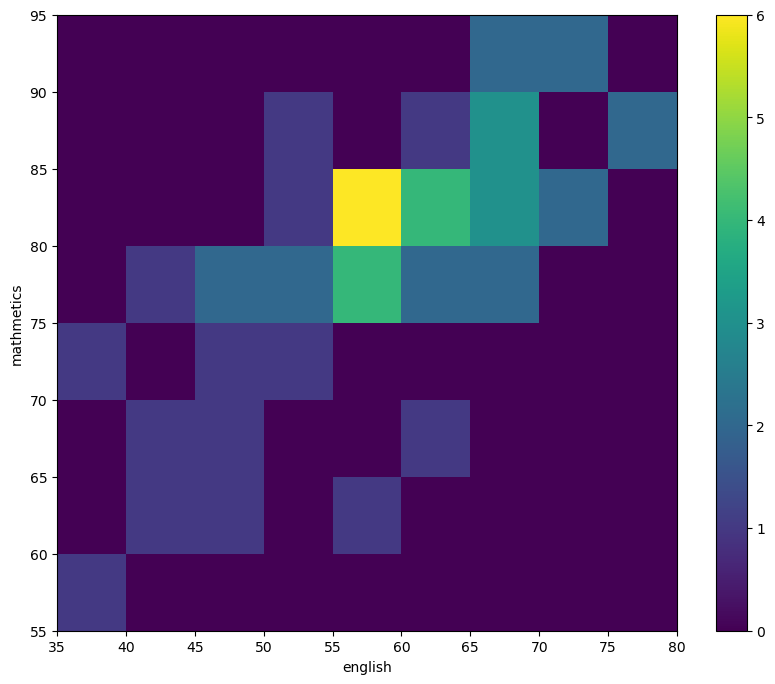

In [20]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins = [9, 8], range = [(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathmetics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax = ax)
plt.show()

In [24]:
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [27]:
stats_df = pd.DataFrame(index = ['X_maen', 'X_varience', 'Y_maen', 
                                 'Y_varience', 'X&Y_correlation', 
                                 'X&Y_regression line'])
for i, data in enumerate(anscombe_data) : 
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i + 1}'] = [f'{np.mean(dataX):.2f}', 
         f'{np.var(dataX):.2f}', 
         f'{np.mean(dataY):.2f}', 
         f'{np.var(dataY):.2f}', 
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
        f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_maen,9.00,9.00,9.00,9.00
X_varience,10.00,10.00,10.00,10.00
Y_maen,7.50,7.50,7.50,7.50
Y_varience,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


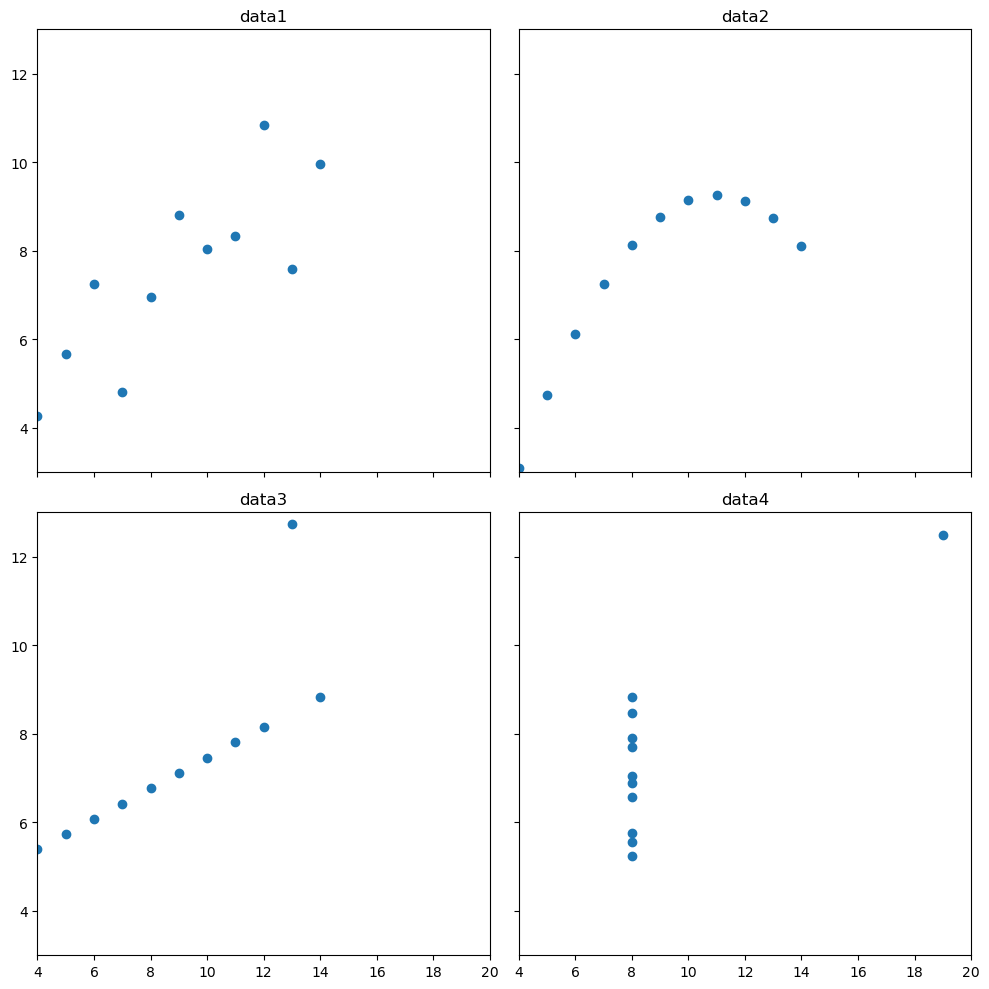

In [28]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), 
                         sharex = True, sharey = True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data) : 
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    polu_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color = 'gray')

plt.tight_layout()
plt.show()